In [10]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%xmode Plain

Exception reporting mode: Plain


## Step 1: Reading and Understanding the Data

In [12]:
bikesharing = pd.read_csv("day.csv")

In [13]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
bikesharing['non-workday'] = 1 - bikesharing['workingday']

In [15]:
bikesharing["season_num"] = bikesharing["season"]

## Step 2: Visualising the Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

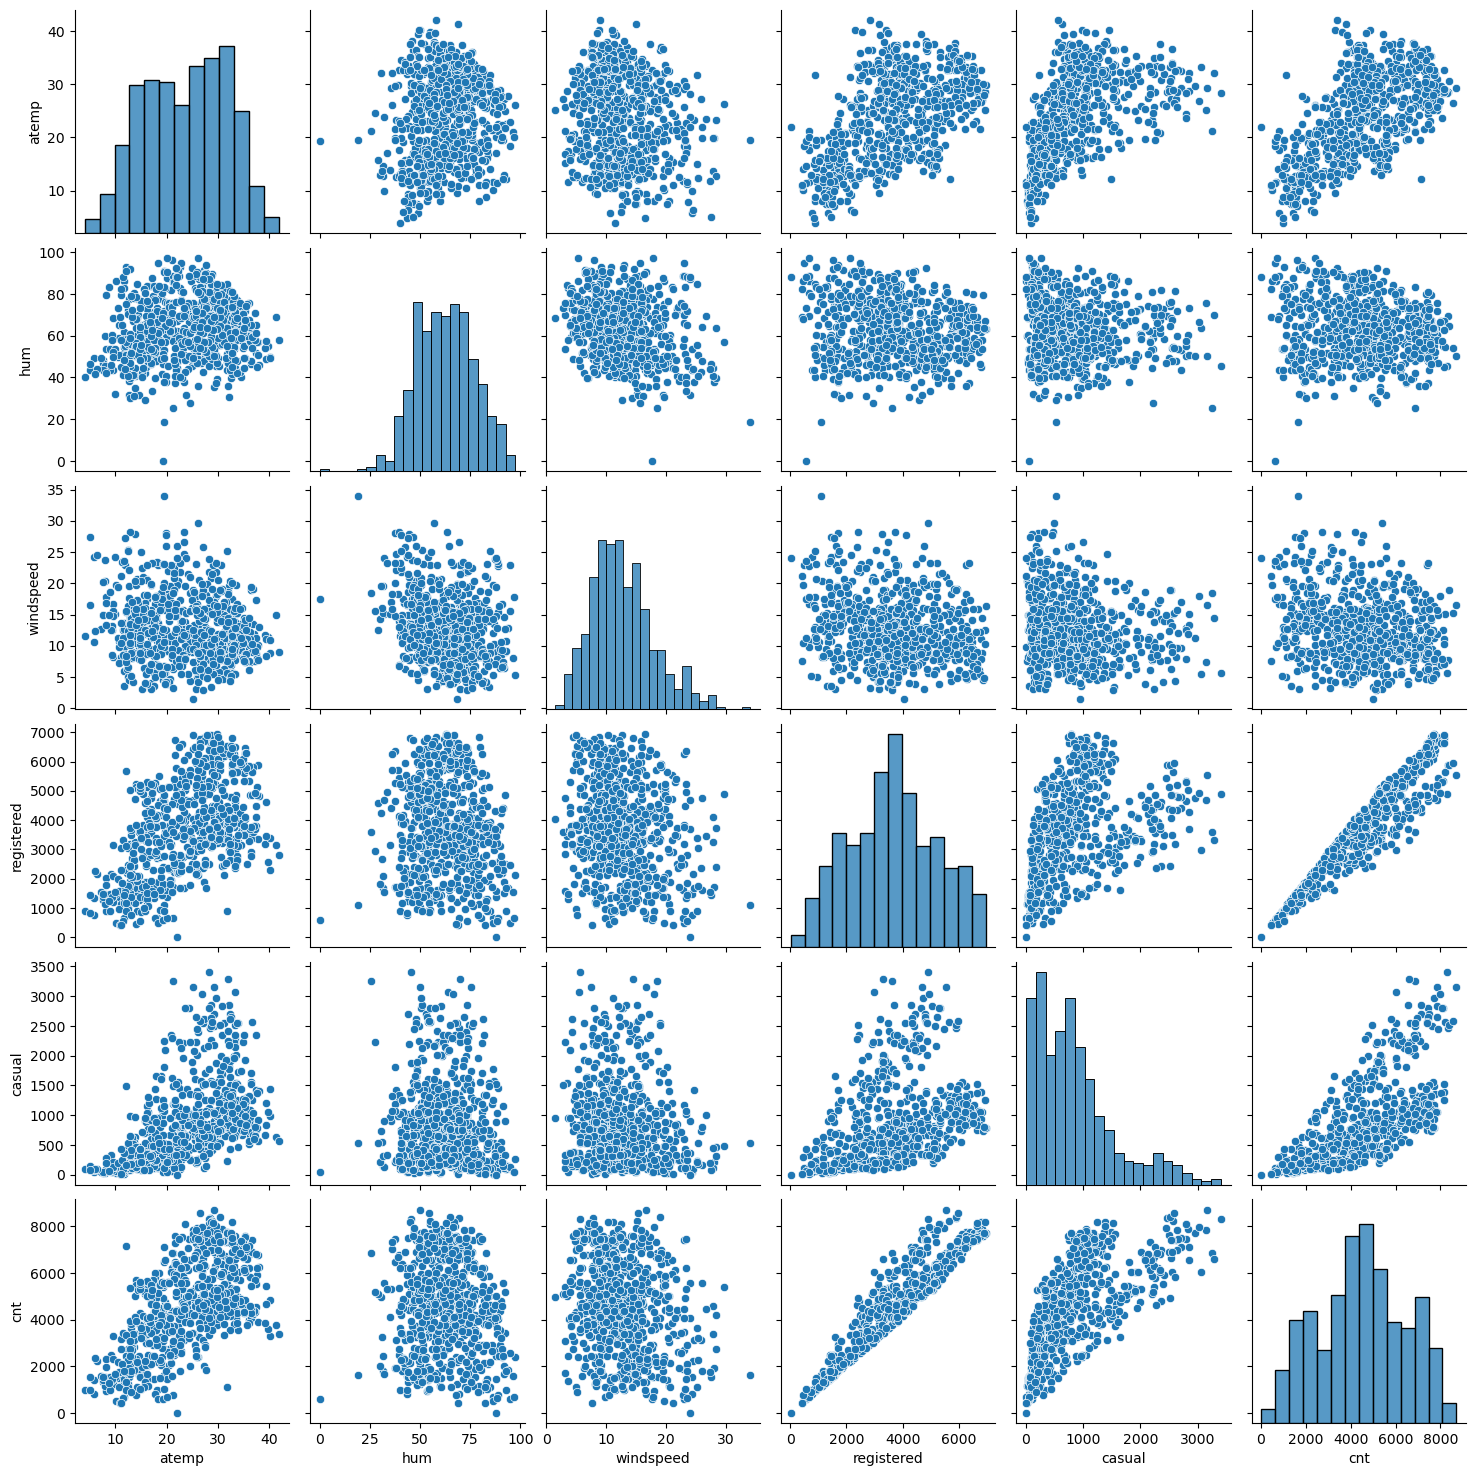

In [18]:
sns.pairplot(bikesharing[['atemp', 'hum', 'windspeed', 'registered', 'casual', 'cnt']])
plt.show()

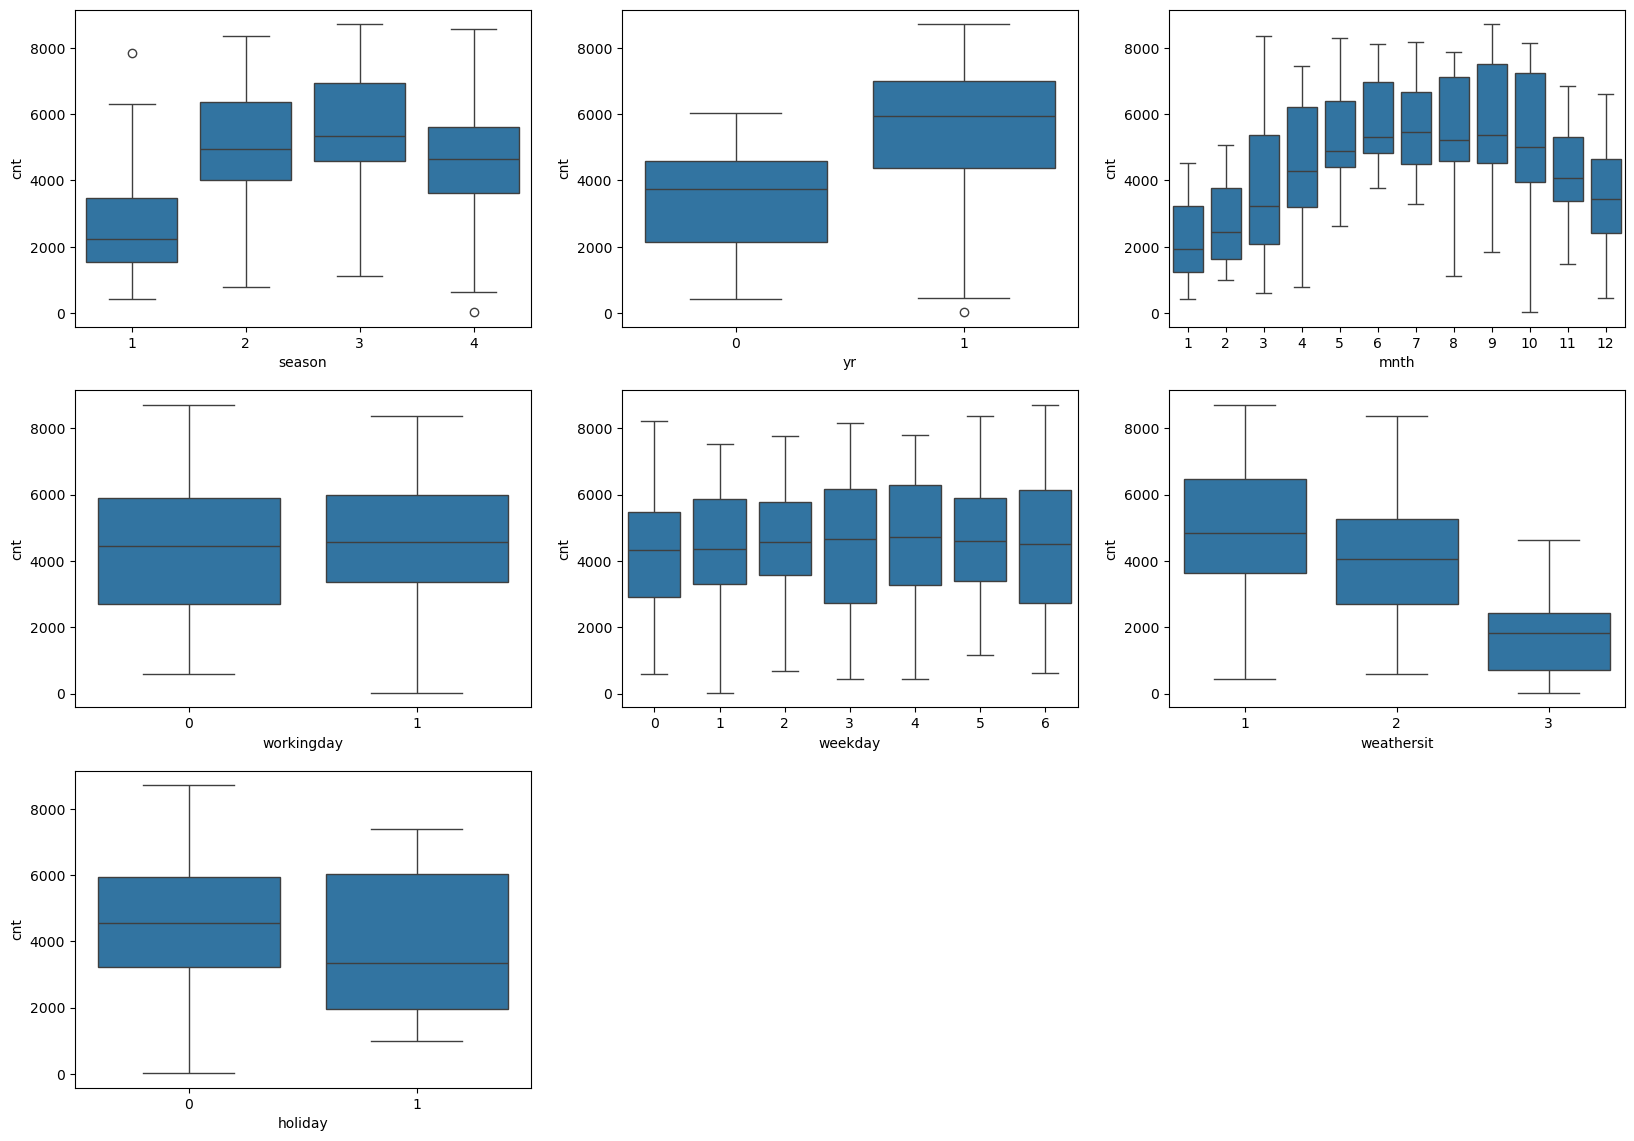

In [19]:
plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.show()

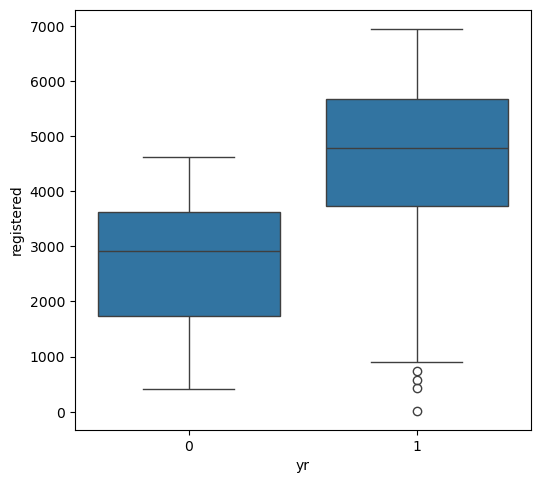

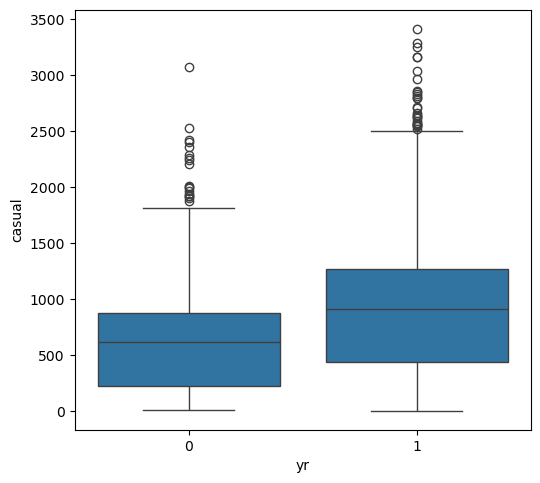

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'registered', data = bikesharing)
plt.figure(figsize=(20, 12))
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = bikesharing)
plt.show()

# Observations

#### cnt is correlated well with registered 

#### cnt is correlated well with season - high in summer and fall, lower in winter and least in spring

#### cnt is correlated well with weather - less usage during bad weather

#### cnt is correlated with casual but less linearly so

#### There is slight correlation with holiday and workingday

#### no correlation or very insignificant correlation with weekday

#### cnt is higher in 2019 than 2018. registered is higher in 2019 than 2018. 
#### HENCE I DECIDED TO DROP 'yr' AND USE 'registered', THOUGH IT WAS SUGGESTED NOT TO DROP 'yr'.

#### cnt varies month over month but the same pattern is visible in season, hence we can drop month and use only season.

#### cnt is correlated with atemp but it is also reflected already in weather, hence we can drop atemp.

## Step 3: Data Preparation

In [23]:
# dummy variables for season
seasons = {1:"spring", 2:"summer", 3:"zfall", 4:"winter"}
def season_string(season_num):
    return seasons[season_num]
# TODO: Use lambda function
bikesharing["season"] = bikesharing["season_num"].apply(season_string)
status = pd.get_dummies(bikesharing['season'], drop_first = True)
bikesharing = pd.concat([bikesharing, status], axis = 1)

In [24]:
# dummy variables for weather
def weather_string(weather_num):
    return weatherst[weather_num]
weatherst = {1:"clear-weather", 2:"average-weather", 3:"bad-weater", 4:"terrible-weather"}
bikesharing["weathersit_num"] = bikesharing["weathersit"]
# TODO: Use lambda function
bikesharing["weathersit"] = bikesharing["weathersit_num"].apply(weather_string)
status = pd.get_dummies(bikesharing['weathersit'], drop_first = True)
bikesharing = pd.concat([bikesharing, status], axis = 1)
#bikesharing.head()

In [25]:
# dummy variable for holiday
bikesharing["holiday"] = bikesharing["holiday"].apply(lambda x: "holiday" if x == 1 else "not_holiday")


In [26]:
status = pd.get_dummies(bikesharing['holiday'], drop_first = True)
bikesharing = pd.concat([bikesharing, status], axis = 1)
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,non-workday,season_num,summer,winter,zfall,weathersit_num,bad-weater,clear-weather,not_holiday
0,1,01-01-2018,spring,0,1,not_holiday,6,0,average-weather,14.110847,...,985,1,1,False,False,False,2,False,False,True
1,2,02-01-2018,spring,0,1,not_holiday,0,0,average-weather,14.902598,...,801,1,1,False,False,False,2,False,False,True
2,3,03-01-2018,spring,0,1,not_holiday,1,1,clear-weather,8.050924,...,1349,0,1,False,False,False,1,False,True,True
3,4,04-01-2018,spring,0,1,not_holiday,2,1,clear-weather,8.200000,...,1562,0,1,False,False,False,1,False,True,True
4,5,05-01-2018,spring,0,1,not_holiday,3,1,clear-weather,9.305237,...,1600,0,1,False,False,False,1,False,True,True


In [27]:
# Drop the original columns for these dummy variables
bikesharing = bikesharing.drop("holiday", axis=1)
bikesharing = bikesharing.drop("weathersit", axis=1)
bikesharing = bikesharing.drop("weathersit_num", axis=1)
bikesharing = bikesharing.drop("season_num", axis=1)
bikesharing.head()

,instant,dteday,season,yr,mnth,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,non-workday,summer,winter,zfall,bad-weater,clear-weather,not_holiday
0,1,01-01-2018,spring,0,1,6,0,14.110847,18.18125,80.5833,...,331,654,985,1,False,False,False,False,False,True
1,2,02-01-2018,spring,0,1,0,0,14.902598,17.68695,69.6087,...,131,670,801,1,False,False,False,False,False,True
2,3,03-01-2018,spring,0,1,1,1,8.050924,9.47025,43.7273,...,120,1229,1349,0,False,False,False,False,True,True
3,4,04-01-2018,spring,0,1,2,1,8.200000,10.60610,59.0435,...,108,1454,1562,0,False,False,False,False,True,True
4,5,05-01-2018,spring,0,1,3,1,9.305237,11.46350,43.6957,...,82,1518,1600,0,False,False,False,False,True,True


## Step 4: Splitting the Data into Training and Testing Sets


In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
df_train.shape

(510, 21)

In [31]:
df_test.shape

(219, 21)

In [32]:
bikesharing.shape

(730, 21)

## Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,instant,dteday,season,yr,mnth,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,non-workday,summer,winter,zfall,bad-weater,clear-weather,not_holiday
653,654,16-10-2019,winter,1,10,2,1,0.509887,0.501133,0.575354,...,0.280402,0.951776,0.864243,0,False,True,False,False,True,True
576,577,31-07-2019,zfall,1,7,2,1,0.815169,0.766351,0.725633,...,0.294422,0.899220,0.827658,0,False,False,True,False,True,True
426,427,03-03-2019,spring,1,3,6,0,0.442393,0.438975,0.640189,...,0.290765,0.446145,0.465255,1,False,False,False,False,False,True
728,729,30-12-2019,spring,1,12,0,0,0.245101,0.200348,0.498067,...,0.110332,0.203869,0.204096,1,False,False,False,False,True,True
482,483,28-04-2019,summer,1,4,6,0,0.395666,0.391735,0.504508,...,0.340750,0.444701,0.482973,1,True,False,False,False,False,True


## checking if there are any null values which need to be substituted. 
## There are none.


In [38]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        730 non-null    int64  
 1   dteday         730 non-null    object 
 2   season         730 non-null    object 
 3   yr             730 non-null    int64  
 4   mnth           730 non-null    int64  
 5   weekday        730 non-null    int64  
 6   workingday     730 non-null    int64  
 7   temp           730 non-null    float64
 8   atemp          730 non-null    float64
 9   hum            730 non-null    float64
 10  windspeed      730 non-null    float64
 11  casual         730 non-null    int64  
 12  registered     730 non-null    int64  
 13  cnt            730 non-null    int64  
 14  non-workday    730 non-null    int64  
 15  summer         730 non-null    bool   
 16  winter         730 non-null    bool   
 17  zfall          730 non-null    bool   
 18  bad-weater

In [39]:
df_train.dtypes

instant            int64
dteday            object
season            object
yr                 int64
mnth               int64
weekday            int64
workingday         int64
temp             float64
atemp            float64
hum              float64
windspeed        float64
casual           float64
registered       float64
cnt              float64
non-workday        int64
summer              bool
winter              bool
zfall               bool
bad-weater          bool
clear-weather       bool
not_holiday         bool
dtype: object

## Step 5: Create models, fit and evaluate each one

### Model 1: registered


In [42]:
# Model 1: registered
import statsmodels.api as sm

y_train = df_train.pop('cnt')
X_train = df_train
# Add a constant
X_train_lm = X_train['registered']
X_train_lm = sm.add_constant(X_train_lm)

# fit
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

lr.summary()

const         0.024532
registered    0.933473
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          1.75e-255
Time:                        16:29:30   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.002       0.009       0.040
registered     0.9335      0.014     67.388      0.000       0.906       0.961
==============================================================================
Omnibus:                      134.360   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.307
Skew:                           1.511   Prob(JB):                     3.64e-56
Kurtosis:                       4.699   Cond. No.                         5.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From Model1 we see 0 p-value and good R2 value for registerd.
### Now we add seasons and create Model 2

In [44]:
# Model 2: add seasons to  model 1 - gives better R-squared than Model 1
X_train_lm = X_train[['registered', 'zfall', 'summer', 'winter']]
X_train_lm = sm.add_constant(X_train_lm)

lr_ols = sm.OLS(y_train, X_train_lm.astype(float))

lr = lr_ols.fit()

print(lr.params)

lr.summary()

const         0.014060
registered    0.873133
zfall         0.072725
summer        0.066173
winter        0.027143
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1325.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          3.77e-266
Time:                        16:29:30   Log-Likelihood:                 661.22
No. Observations:                 510   AIC:                            -1312.
Df Residuals:                     505   BIC:                            -1291.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0141      0.008      1.818      0.070      -0.001       0.029
registered     0.8731      0.015     57.463      0.000       0.843       0.903
zfall          0.0727      0.010      7.536      0.000       0.054       0.092
summer         0.0662      0.009      7.235      0.000       0.048       0.084
winter         0.0271      0.009      2.980      0.003       0.009       0.045
==============================================================================
Omnibus:                      151.364   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.765
Skew:                           1.592   Prob(JB):                     2.47e-72
Kurtosis:                       5.320   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We got better R2 value in Model 2
### Now over to Model 3 adding weather

In [46]:
# Model 3: add weather variables to model 2 - gives better R-squared than Model 2
X_train_lm = X_train[['registered', 'zfall', 'summer', 'winter', 'bad-weater', 'clear-weather']]
X_train_lm = sm.add_constant(X_train_lm)

# fit
lr_ols = sm.OLS(y_train, X_train_lm.astype(float))

lr = lr_ols.fit()

print(lr.params)

lr.summary()

const            0.008224
registered       0.850244
zfall            0.078994
summer           0.071980
winter           0.035552
bad-weater      -0.040411
clear-weather    0.022078
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     919.2
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          2.20e-267
Time:                        16:29:30   Log-Likelihood:                 671.40
No. Observations:                 510   AIC:                            -1329.
Df Residuals:                     503   BIC:                            -1299.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0082      0.008      0.988      0.324      -0.008       0.025
registered        0.8502      0.016     53.787      0.000       0.819       0.881
zfall             0.0790      0.010      8.220      0.000       0.060       0.098
summer            0.0720      0.009      7.930      0.000       0.054       0.090
winter            0.0356      0.009      3.876      0.000       0.018       0.054
bad-weater       -0.0404      0.018     -2.227      0.026      -0.076      -0.005
clear-weather     0.0221      0.006      3.512      0.000       0.010       0.034
==============================================================================
Omnibus:                      156.889   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.403
Skew:                           1.609   Prob(JB):                     1.22e-79
Kurtosis:                       5.598   Cond. No.                         9.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now over to Model 4 adding holiday

In [48]:
# Model 4: add holiday to model3 - not much improvement in R-squared and high p-value for holiday
X_train_lm = X_train[['registered', 'zfall', 'summer', 'winter', 'bad-weater', 'clear-weather', 'not_holiday']]
X_train_lm = sm.add_constant(X_train_lm)

lr_ols = sm.OLS(y_train, X_train_lm.astype(float))

lr = lr_ols.fit()
print(lr.params)

lr.summary()

const            0.024197
registered       0.852055
zfall            0.078857
summer           0.072098
winter           0.035086
bad-weater      -0.039562
clear-weather    0.021679
not_holiday     -0.017006
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     787.7
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          4.58e-266
Time:                        16:29:30   Log-Likelihood:                 671.82
No. Observations:                 510   AIC:                            -1328.
Df Residuals:                     502   BIC:                            -1294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0242      0.019      1.250      0.212      -0.014       0.062
registered        0.8521      0.016     53.474      0.000       0.821       0.883
zfall             0.0789      0.010      8.203      0.000       0.060       0.098
summer            0.0721      0.009      7.941      0.000       0.054       0.090
winter            0.0351      0.009      3.818      0.000       0.017       0.053
bad-weater       -0.0396      0.018     -2.177      0.030      -0.075      -0.004
clear-weather     0.0217      0.006      3.440      0.001       0.009       0.034
not_holiday      -0.0170      0.019     -0.914      0.361      -0.054       0.020
==============================================================================
Omnibus:                      158.909   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.207
Skew:                           1.624   Prob(JB):                     1.50e-81
Kurtosis:                       5.639   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### There is no improvement in R2 in Model 4 and holiday has high p-value
### Checking VIFs for this model, we see VIF for holiday above 5

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# VIFs for Model 4
X_train_lm = X_train[['registered', 'zfall', 'summer', 'winter', 'bad-weater', 'clear-weather', 'not_holiday']].astype(int)
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,not_holiday,5.37
5,clear-weather,2.68
1,zfall,2.05
2,summer,1.97
3,winter,1.95
4,bad-weater,1.10
0,registered,1.01


In [52]:
X_train_lm.describe()

,registered,zfall,summer,winter,bad-weater,clear-weather,not_holiday
count,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.001961,0.262745,0.245098,0.24902,0.029412,0.627451,0.974510
std,0.044281,0.440557,0.430568,0.43287,0.169124,0.483958,0.157763
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
75%,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Create model5 in which we replace holiday with workingday 

In [54]:
# Model 5: replace holiday with workingday from model 4 - Improvement over Model 4 and also good p-value for workingday
# 
X_train_lm = X_train[['registered', 'zfall', 'summer', 'winter', 'bad-weater', 'clear-weather', 'workingday']]
X_train_lm = sm.add_constant(X_train_lm)

lr_ols = sm.OLS(y_train, X_train_lm.astype(float))

lr = lr_ols.fit()
print(lr.params)
lr.summary()

const            0.053324
registered       0.966326
zfall            0.050108
summer           0.052222
winter           0.004379
bad-weater      -0.004933
clear-weather    0.007471
workingday      -0.114719
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1926.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:29:31   Log-Likelihood:                 886.92
No. Observations:                 510   AIC:                            -1758.
Df Residuals:                     502   BIC:                            -1724.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0533      0.006      9.301      0.000       0.042       0.065
registered        0.9663      0.011     85.498      0.000       0.944       0.989
zfall             0.0501      0.006      7.826      0.000       0.038       0.063
summer            0.0522      0.006      8.699      0.000       0.040       0.064
winter            0.0044      0.006      0.714      0.476      -0.008       0.016
bad-weater       -0.0049      0.012     -0.412      0.681      -0.028       0.019
clear-weather     0.0075      0.004      1.795      0.073      -0.001       0.016
workingday       -0.1147      0.004    -25.823      0.000      -0.123      -0.106
==============================================================================
Omnibus:                       73.305   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.475
Skew:                           0.818   Prob(JB):                     4.24e-32
Kurtosis:                       5.031   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#  VIFs for Model 5
X_train_lm = X_train[['registered', 'zfall', 'summer', 'winter', 'bad-weater', 'clear-weather', 'workingday']].astype(int)
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,workingday,2.31
5,clear-weather,2.13
1,zfall,1.65
2,summer,1.54
3,winter,1.50
4,bad-weater,1.08
0,registered,1.01


### We saw better R2 and better VIFs for Model5 
### It also shows higher p-values for bad-weather so we try removing it in Model6

In [57]:
# Model 6: Remove bad-weather from Model 5 as it has high p-value
X_train_lm = X_train[['registered', 'zfall', 'summer', 'winter', 'clear-weather', 'workingday']]
X_train_lm = sm.add_constant(X_train_lm)

lr_ols = sm.OLS(y_train, X_train_lm.astype(float))

lr = lr_ols.fit()
print(lr.params)
lr.summary()

const            0.052840
registered       0.967499
zfall            0.049694
summer           0.051968
winter           0.003886
clear-weather    0.007726
workingday      -0.114929
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2251.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:29:31   Log-Likelihood:                 886.83
No. Observations:                 510   AIC:                            -1760.
Df Residuals:                     503   BIC:                            -1730.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0528      0.006      9.424      0.000       0.042       0.064
registered        0.9675      0.011     88.532      0.000       0.946       0.989
zfall             0.0497      0.006      7.866      0.000       0.037       0.062
summer            0.0520      0.006      8.710      0.000       0.040       0.064
winter            0.0039      0.006      0.646      0.518      -0.008       0.016
clear-weather     0.0077      0.004      1.879      0.061      -0.000       0.016
workingday       -0.1149      0.004    -26.064      0.000      -0.124      -0.106
==============================================================================
Omnibus:                       72.518   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.453
Skew:                           0.808   Prob(JB):                     7.07e-32
Kurtosis:                       5.034   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model6 showed same R2 value but higher p-value for winter.
### Create Model7 removing winter

In [59]:
# Model 7: Remove winter from Model 6 as winter had high p-value
# R-square is same as Model 6 and all p-values are good except clear-weather
# is slightly on higher side.

X_train_lm7 = X_train[['registered', 'zfall', 'summer', 'clear-weather', 'workingday']]
X_train_lm7 = sm.add_constant(X_train_lm7)

lr_ols = sm.OLS(y_train, X_train_lm7.astype(float))

lr7 = lr_ols.fit()
print(lr7.params)
lr7.summary()

const            0.054025
registered       0.970585
zfall            0.047165
summer           0.049684
clear-weather    0.007305
workingday      -0.115438
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2704.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:29:31   Log-Likelihood:                 886.62
No. Observations:                 510   AIC:                            -1761.
Df Residuals:                     504   BIC:                            -1736.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0540      0.005     10.202      0.000       0.044       0.064
registered        0.9706      0.010     98.797      0.000       0.951       0.990
zfall             0.0472      0.005      9.515      0.000       0.037       0.057
summer            0.0497      0.005     10.342      0.000       0.040       0.059
clear-weather     0.0073      0.004      1.800      0.072      -0.001       0.015
workingday       -0.1154      0.004    -26.624      0.000      -0.124      -0.107
==============================================================================
Omnibus:                       70.862   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.792
Skew:                           0.796   Prob(JB):                     7.27e-31
Kurtosis:                       5.000   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#  VIFs for Model 7
X_train_lm7_a = X_train[['registered', 'zfall', 'summer', 'clear-weather', 'workingday']].astype(int)
vif = pd.DataFrame()
vif['Features'] = X_train_lm7_a.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm7_a.values, i) for i in range(X_train_lm7_a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,workingday,1.99
3,clear-weather,1.88
1,zfall,1.45
2,summer,1.37
0,registered,1.01


### As seen above, R2 is same as Model 6 and all p-values are good except clear-weather but it is very slightly on higher side
### Now check error terms for model7

Text(0.5, 0, 'Errors')

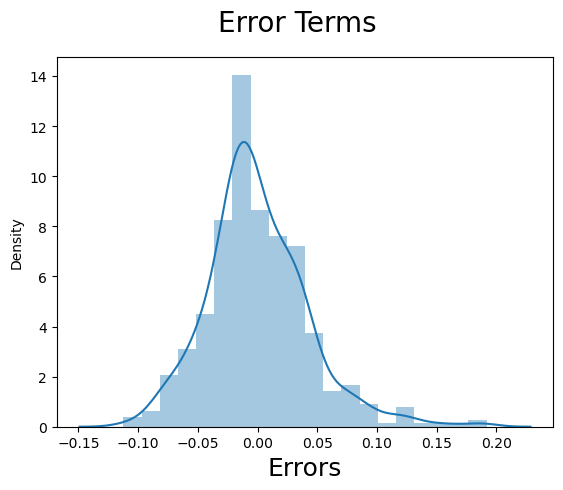

In [62]:
# Check error terms for Model 7
X_train_lm7 = X_train[['registered', 'zfall', 'summer', 'clear-weather', 'workingday']]
X_train_lm7 = sm.add_constant(X_train_lm7)

y_train_cnt = lr7.predict(X_train_lm7)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_train_cnt')

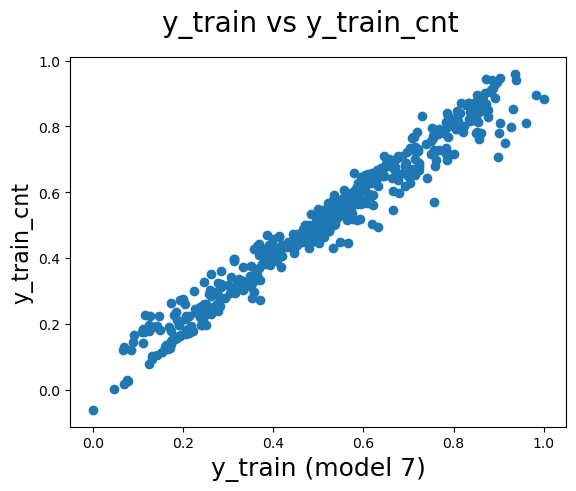

In [63]:
# Plotting y_train and y_train_cnt to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_cnt)
fig.suptitle('y_train vs y_train_cnt', fontsize = 20)              # Plot heading 
plt.xlabel('y_train (model 7)', fontsize = 18)                          # X-label
plt.ylabel('y_train_cnt', fontsize = 16)      

### Model7 has slightly high p-value for weather. Also clear-weather's coefficient is the least
### Create Model8 removing weather 

In [65]:
# Model 8: Remove weather from Model 7 as winter had high p-value
# R-square is same as Model 7 and all p-values are good 

X_train_lm8 = X_train[['registered', 'zfall', 'summer', 'workingday']]
X_train_lm8 = sm.add_constant(X_train_lm8)

lr_ols = sm.OLS(y_train, X_train_lm8.astype(float))

lr8 = lr_ols.fit()
print(lr8.params)
lr8.summary()


const         0.057187
registered    0.974859
zfall         0.047032
summer        0.049311
workingday   -0.116461
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     3364.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:29:33   Log-Likelihood:                 884.98
No. Observations:                 510   AIC:                            -1760.
Df Residuals:                     505   BIC:                            -1739.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0572      0.005     11.422      0.000       0.047       0.067
registered     0.9749      0.010    102.038      0.000       0.956       0.994
zfall          0.0470      0.005      9.469      0.000       0.037       0.057
summer         0.0493      0.005     10.251      0.000       0.040       0.059
workingday    -0.1165      0.004    -27.034      0.000      -0.125      -0.108
==============================================================================
Omnibus:                       67.175   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.117
Skew:                           0.771   Prob(JB):                     2.49e-28
Kurtosis:                       4.898   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#  VIFs for Model 8
X_train_lm8 = X_train[['registered', 'zfall', 'summer', 'workingday']].astype(int)
vif = pd.DataFrame()
vif['Features'] = X_train_lm8.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm8.values, i) for i in range(X_train_lm8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,1.63
1,zfall,1.32
2,summer,1.30
0,registered,1.00


Text(0.5, 0, 'Errors')

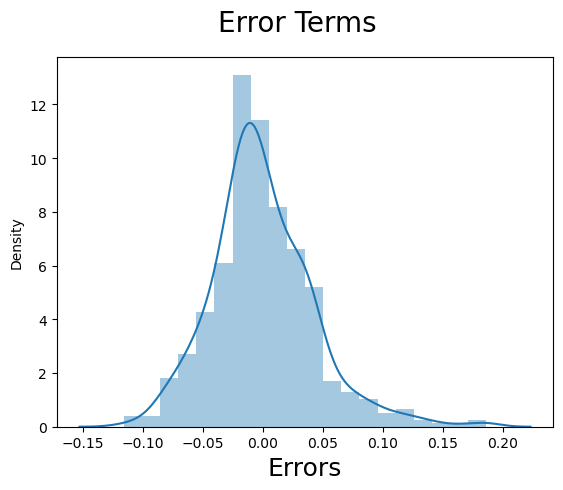

In [67]:
# . Check error terms for Model 8
X_train_lm8 = X_train[['registered', 'zfall', 'summer', 'workingday']]
X_train_lm8 = sm.add_constant(X_train_lm8)

y_train_cnt = lr8.predict(X_train_lm8)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Trying few more models 
#### Use holiday instead of workingday
#### Use bad-weather instead of clear-weather
#### Use months instead of season

In [69]:
# Try a Model with bad-weather instead of clear-weather - REJECT as p value of 
# bad-weather is 0.554
X_train_lm = X_train[['registered', 'zfall', 'summer', 'bad-weater', 'workingday']]
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr_ols = sm.OLS(y_train, X_train_lm.astype(float))

lr = lr_ols.fit()
print(lr.params)
lr.summary()

const         0.057884
registered    0.973521
zfall         0.047170
summer        0.049283
bad-weater   -0.006863
workingday   -0.116200
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2688.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:29:34   Log-Likelihood:                 885.16
No. Observations:                 510   AIC:                            -1758.
Df Residuals:                     504   BIC:                            -1733.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0579      0.005     11.248      0.000       0.048       0.068
registered     0.9735      0.010     99.104      0.000       0.954       0.993
zfall          0.0472      0.005      9.480      0.000       0.037       0.057
summer         0.0493      0.005     10.238      0.000       0.040       0.059
bad-weater    -0.0069      0.012     -0.593      0.554      -0.030       0.016
workingday    -0.1162      0.004    -26.815      0.000      -0.125      -0.108
==============================================================================
Omnibus:                       68.201   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.340
Skew:                           0.784   Prob(JB):                     1.35e-28
Kurtosis:                       4.893   Cond. No.                         9.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Try another Model with holiday instead of working day - REJECT as R-squared reduced and 
# p value of not_holiday is high (0.159)
X_train_lm = X_train[['registered', 'zfall', 'summer', 'not_holiday']]
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr_ols = sm.OLS(y_train, X_train_lm.astype(float))

lr = lr_ols.fit()
print(lr.params)
lr.summary()

const          0.044909
registered     0.892532
zfall          0.055623
summer         0.051038
not_holiday   -0.026732
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1306.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          1.14e-264
Time:                        16:29:34   Log-Likelihood:                 657.78
No. Observations:                 510   AIC:                            -1306.
Df Residuals:                     505   BIC:                            -1284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0449      0.019      2.342      0.020       0.007       0.083
registered      0.8925      0.014     63.020      0.000       0.865       0.920
zfall           0.0556      0.008      7.184      0.000       0.040       0.071
summer          0.0510      0.008      6.784      0.000       0.036       0.066
not_holiday    -0.0267      0.019     -1.409      0.159      -0.064       0.011
==============================================================================
Omnibus:                      157.241   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.197
Skew:                           1.650   Prob(JB):                     2.46e-76
Kurtosis:                       5.343   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Tried another model with mnth instead of season. This did not show any improvement. 
# Also 11 dummy variables had to be added hence that model is not considered


### So these three models were tried but none came out better than model8
### So we take model8 as the final and start prediction using it

# Step 6: Making Predictions Using the Final Model

##### lr8 (model 8) is the final model 
##### Now we start predicting using test data using lr8

In [75]:
lr8.params

const         0.057187
registered    0.974859
zfall         0.047032
summer        0.049311
workingday   -0.116461
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.057187 + 0.974859 \times registered + 0.047032 \times  fall + 0.049311 \times summer - 0.116461 \times workingday $

#### Apply scaling on test data before prediction

In [78]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'registered', 'casual', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [79]:
df_test.describe()

,instant,yr,mnth,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,non-workday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,356.776256,0.479452,6.474886,3.018265,0.698630,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.301370
std,213.665198,0.500722,3.421875,1.988415,0.459904,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.459904
min,4.000000,0.000000,1.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000
25%,171.000000,0.000000,4.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000
50%,349.000000,0.000000,6.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000
75%,537.500000,1.000000,9.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000
max,730.000000,1.000000,12.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000


In [80]:
from sklearn.metrics import r2_score

In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test_m8 = X_test[['registered', 'zfall', 'summer', 'workingday']]
# Adding constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test_m8)

# Making predictions using model 8

y_pred_m8 = lr8.predict(X_test_m8)

Text(0, 0.5, 'y_pred')

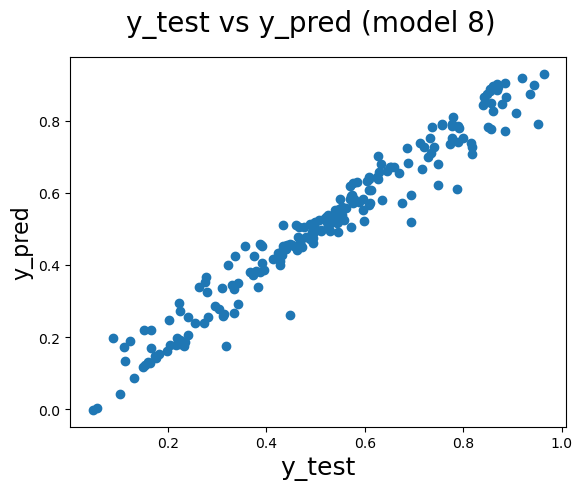

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m8)
fig.suptitle('y_test vs y_pred (model 8)', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0.5, 0, 'Errors')

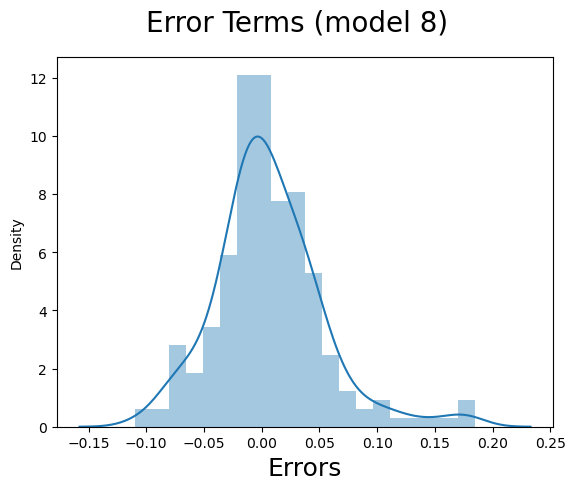

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_m8), bins = 20)
fig.suptitle('Error Terms (model 8)', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### R2 score for model8 based on predicted values

In [85]:
r2_score(y_test, y_pred_m8)


0.9526036693102083

# Conclusion

#### We have identified four variables - registered, workingday, fall and summer

$ cnt = 0.057187 + 0.974859 \times registered + 0.047032 \times  fall + 0.049311 \times summer - 0.116461 \times workingday $

Based on the values of coefficients,  the maximum impacting variable is 'registered'.

The next is 'workingday' which has negative coefficient implying that on working days the usage of bikes is lesser than non working days.

### Recommendations:

More users need to be registered to increase the business by offering more incentives for those who register.

On working days use of shared bikes is lesser. To increase the usage on workingdays some new ideas need to be thought and attempted. For example, the bikesharing company can tie up with other businesses and offer incentives for promoting bike usage during workingdays. May be additional pickup and drop points  near other businesses can be added.

The other factors are dependent season. They have low coefficients. Still the business may try some ideas like offering discounts during fall and winter seasons to attract more users. They can provide winter wear at discounted rates when users register.